## 📊 About the Dataset

This dataset contains detailed product information from two of the biggest sports brands in the world — **Adidas** and **Nike**. It includes **3,268 products**, each described by 10 attributes (columns), covering pricing, branding, customer ratings, and product metadata. These columns are:

- **Product Name**: The name/title of the product.
- **Product ID**: A unique identifier for each product.
- **Listing Price**: The original listed price before discount.
- **Sale Price**: The price after discount (if any).
- **Discount**: The percentage of discount applied.
- **Brand**: The brand name (either Adidas or Nike).
- **Description**: A short textual description of the product.
- **Rating**: Average user rating (from 0 to 5).
- **Reviews**: Number of customer reviews for the product.
- **Last Visited**: Timestamp of the last recorded customer visit.

The dataset was sourced from [data.world](https://www.kaggle.com/datasets/kaushiksuresh147/adidas-vs-nike) and contributed by **Datahut** and **Tony Paul**. It can be used for **exploratory data analysis (EDA)**, **product clustering**, and **competitive analysis** to understand the pricing, discount strategies, and customer preferences of both brands.

The dataset is in the **public domain (CC0)** and is updated annually.

We will use this dataset to answer key questions such as:
- Which brand offers better discounts?
- Are Adidas products more highly rated than Nike?
- How can products be grouped based on their characteristics?

This analysis can offer valuable insights into the **sportswear retail market** and customer behavior.


In [3]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mennaw39haleem","key":"bc6207804e8b3098285b0ef046706717"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kaushiksuresh147/adidas-vs-nike
!unzip adidas-vs-nike.zip

Dataset URL: https://www.kaggle.com/datasets/kaushiksuresh147/adidas-vs-nike
License(s): CC0-1.0
  0% 0.00/278k [00:00<?, ?B/s]
100% 278k/278k [00:00<00:00, 554MB/s]
Archive:  adidas-vs-nike.zip
  inflating: Adidas Vs Nike.csv      


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [6]:
df=pd.read_csv('Adidas Vs Nike.csv')
df.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


In [7]:
df.describe()

,Listing Price,Sale Price,Discount,Rating,Reviews
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000
mean,6868.020196,6134.265606,26.875765,3.242105,40.551714
std,4724.659386,4293.247581,22.633487,1.428856,31.543491
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4299.000000,2999.000000,0.000000,2.600000,10.000000
50%,5999.000000,4799.000000,40.000000,3.500000,37.000000
75%,8999.000000,7995.000000,50.000000,4.400000,68.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Description    3265 non-null   object 
 7   Rating         3268 non-null   float64
 8   Reviews        3268 non-null   int64  
 9   Last Visited   3268 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 255.4+ KB


In [9]:
df['Description'].isnull().sum()

np.int64(3)

In [10]:
df['Description'] = df['Description'].fillna('No description')

In [11]:
df['Last Visited'] = pd.to_datetime(df['Last Visited'])

In [12]:
df = df[df['Listing Price'] > 0]

In [13]:
df['Price Drop'] = df['Listing Price'] - df['Sale Price']
df['Computed Discount'] = (df['Price Drop'] / df['Listing Price']) * 100

In [14]:
df['Brand']

,Brand
0,Adidas Adidas ORIGINALS
1,Adidas ORIGINALS
2,Adidas CORE / NEO
3,Adidas CORE / NEO
4,Adidas ORIGINALS
...,...
3261,Nike
3263,Nike
3264,Nike
3265,Nike


Text(0.5, 1.0, 'Distribution of Listing Price')

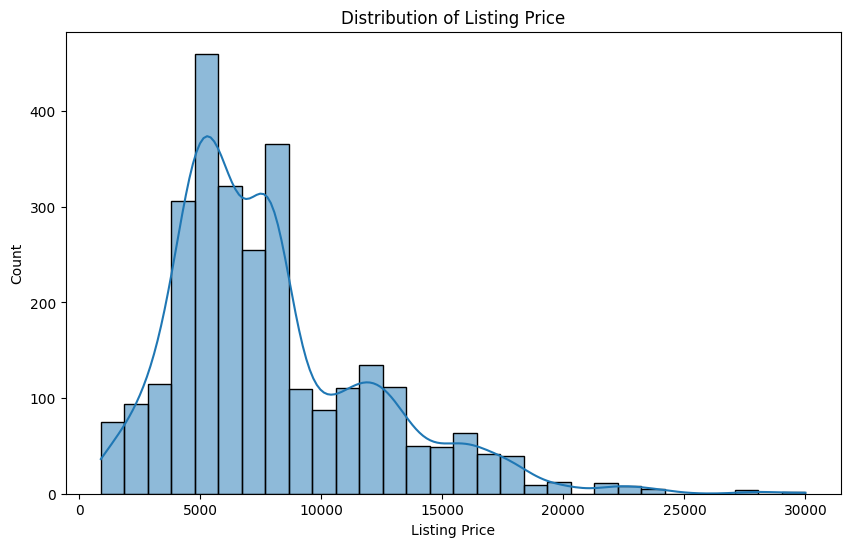

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df['Listing Price'], kde=True, bins=30)
plt.title('Distribution of Listing Price')

Text(0.5, 1.0, 'Sale vs Listing Price by Brand')

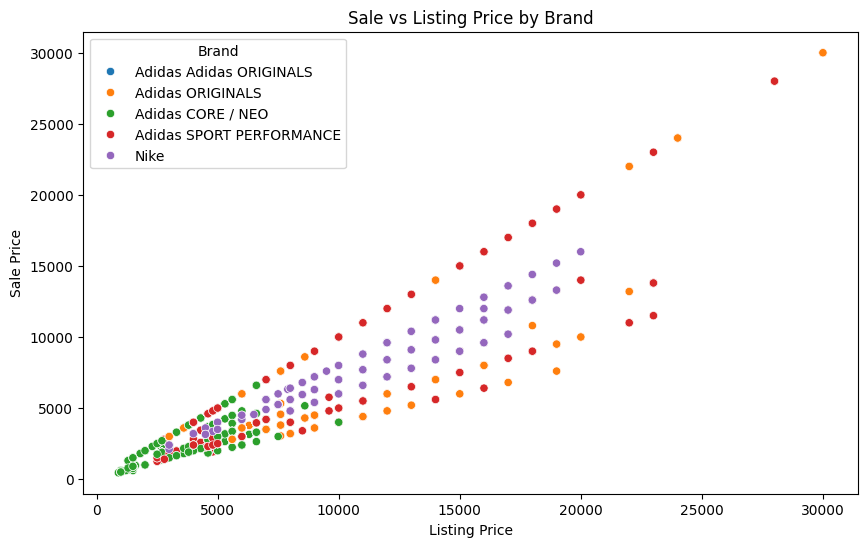

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Listing Price', y='Sale Price', hue='Brand')
plt.title('Sale vs Listing Price by Brand')

Text(0.5, 1.0, 'Discount Distribution by Brand')

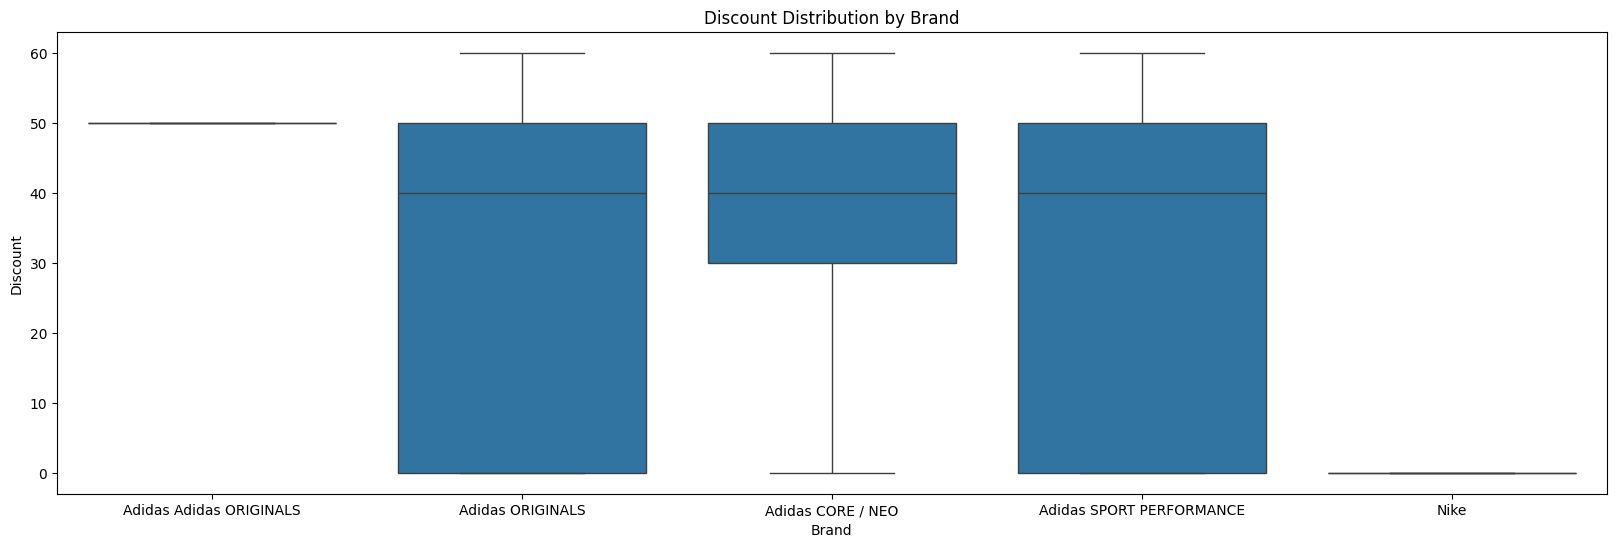

In [17]:
plt.figure(figsize=(20,6))
sns.boxplot(data=df, x='Brand', y='Discount')
plt.title('Discount Distribution by Brand')

Text(0.5, 1.0, 'Rating vs Reviews by Brand')

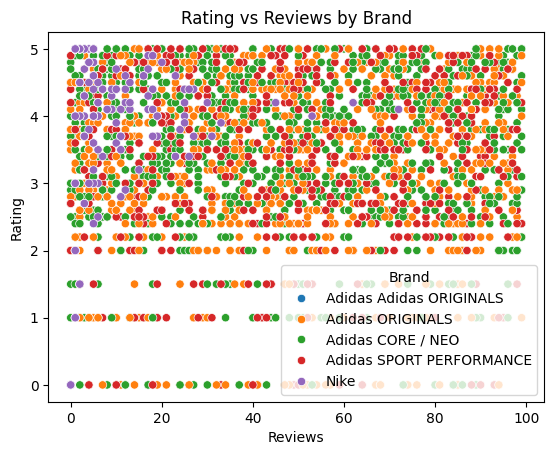

In [18]:
sns.scatterplot(data=df, x='Reviews', y='Rating', hue='Brand')
plt.title('Rating vs Reviews by Brand')

In [19]:
numeric_cols = ['Listing Price', 'Sale Price', 'Discount', 'Rating', 'Reviews']

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers


In [20]:
outliers_dict = {}
for col in numeric_cols:
    outliers = detect_outliers(df, col)
    outliers_dict[col] = len(outliers)
    print(f"{col} → numbers of outlier {len(outliers)}")

Listing Price → numbers of outlier 90
Sale Price → numbers of outlier 94
Discount → numbers of outlier 0
Rating → numbers of outlier 135
Reviews → numbers of outlier 0


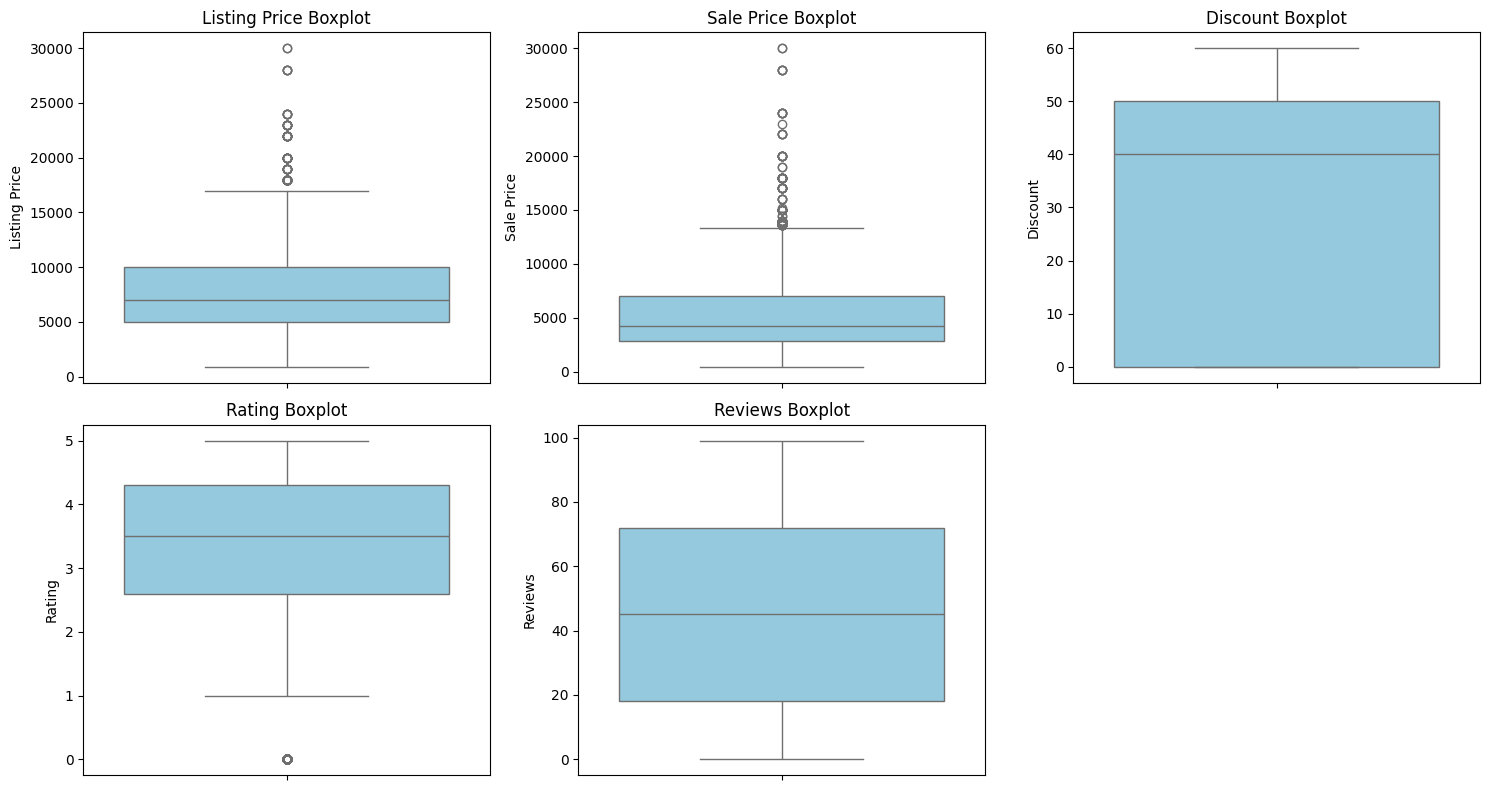

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f"{col} Boxplot")

plt.tight_layout()
plt.show()

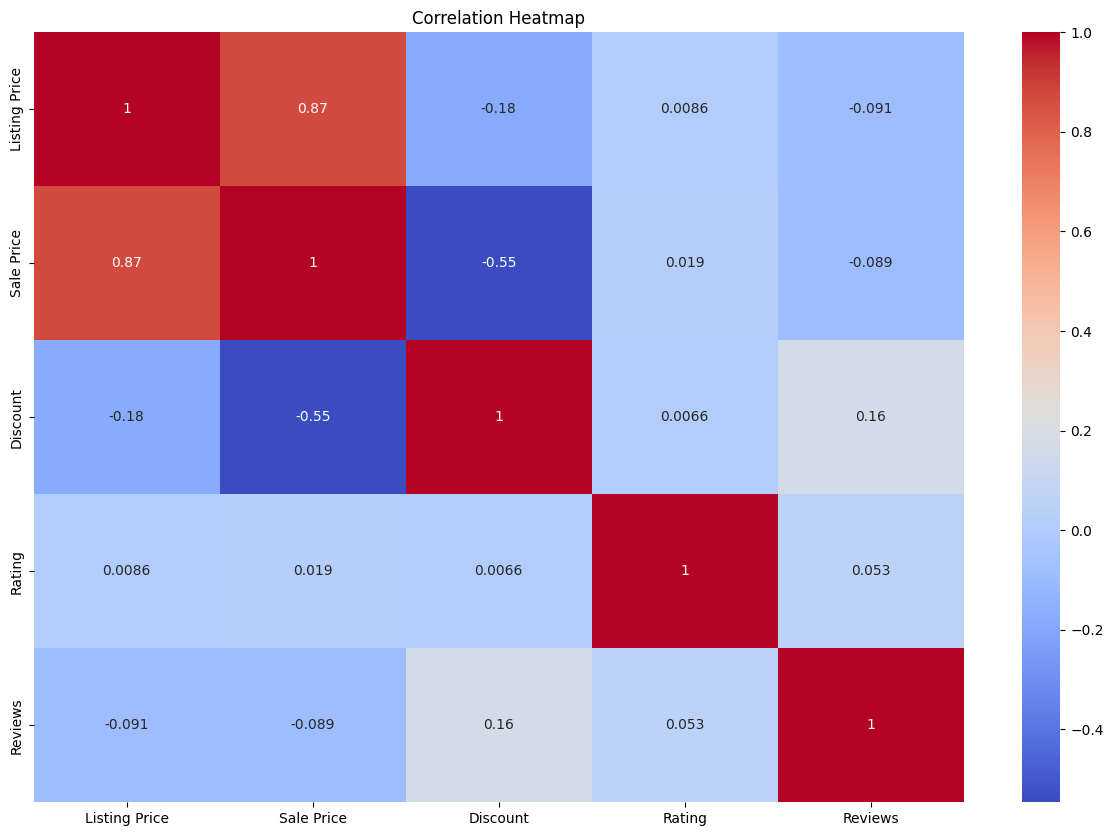

In [22]:
plt.figure(figsize=(15, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [23]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

for col in numeric_cols:
    df = remove_outliers(df, col)

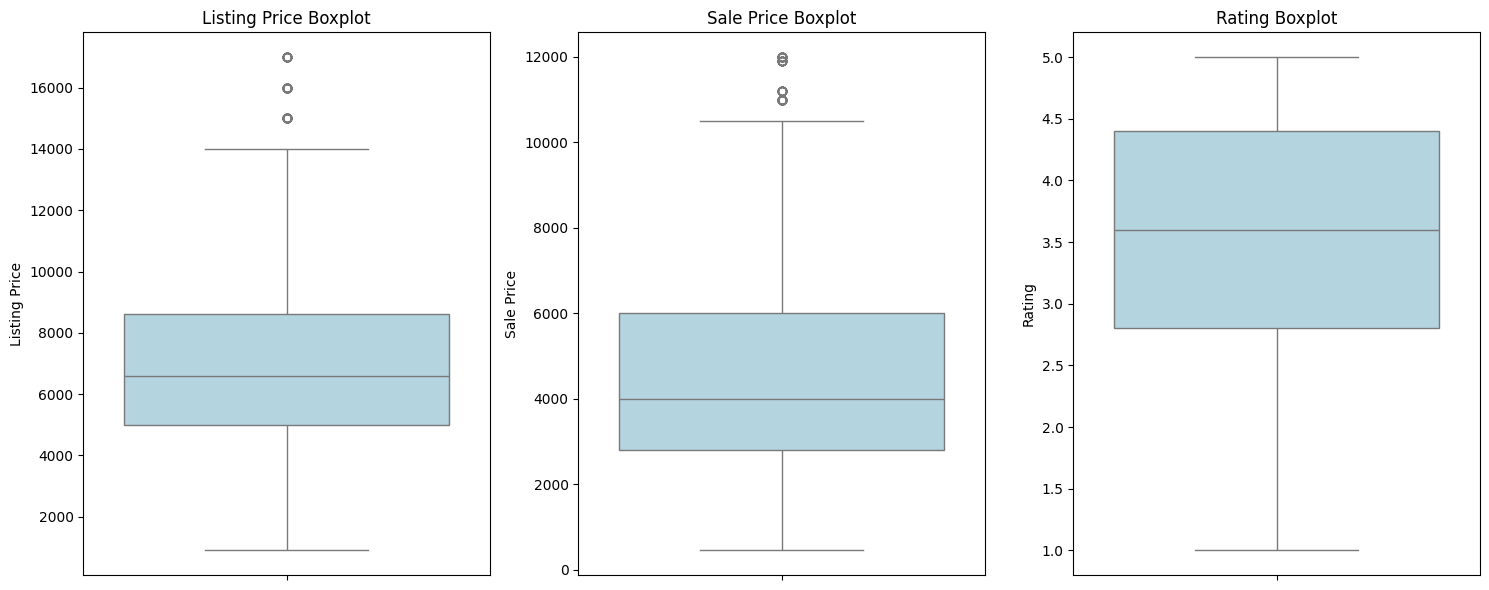

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
for i, col in enumerate(['Listing Price', 'Sale Price', 'Rating']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'{col} Boxplot')

plt.tight_layout()
plt.show()


In [25]:
df['Brand'].unique()

array(['Adidas Adidas ORIGINALS', 'Adidas ORIGINALS', 'Adidas CORE / NEO',
       'Adidas SPORT PERFORMANCE', 'Nike'], dtype=object)

In [26]:
df['Brand'] = df['Brand'].apply(lambda x: 'Nike' if 'Nike' in x else 'Adidas')

In [27]:
df['Brand'] = df['Brand'].astype('category').cat.codes

In [28]:
df['Brand']

,Brand
0,0
1,0
2,0
3,0
4,0
...,...
3233,1
3235,1
3237,1
3261,1


In [29]:
features = df[['Listing Price', 'Sale Price', 'Discount', 'Rating', 'Reviews']]

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


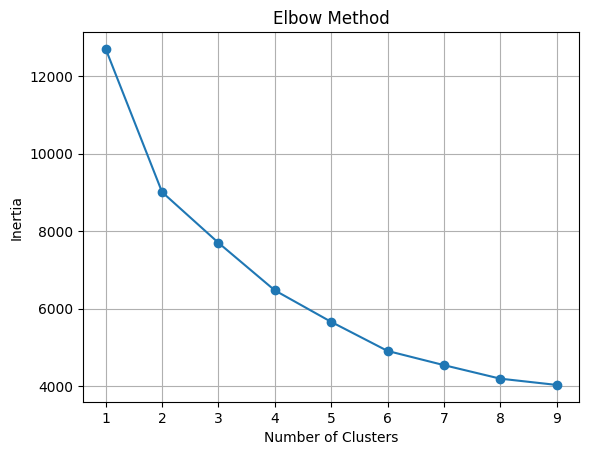

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [32]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

In [33]:
df['Cluster'].value_counts()

,count
Cluster,
1,1727
0,815


In [34]:
pd.crosstab(df['Cluster'], df['Brand'], margins=True)

Brand,0,1,All
Cluster,,,
0,690,125,815
1,1720,7,1727
All,2410,132,2542


In [35]:
df.groupby('Cluster')[['Listing Price', 'Sale Price', 'Discount', 'Rating', 'Reviews']].mean()


,Listing Price,Sale Price,Discount,Rating,Reviews
Cluster,,,,,
0,10426.975460,7736.571779,16.748466,3.638037,41.858896
1,5688.097858,3254.550087,40.619572,3.418761,49.123914


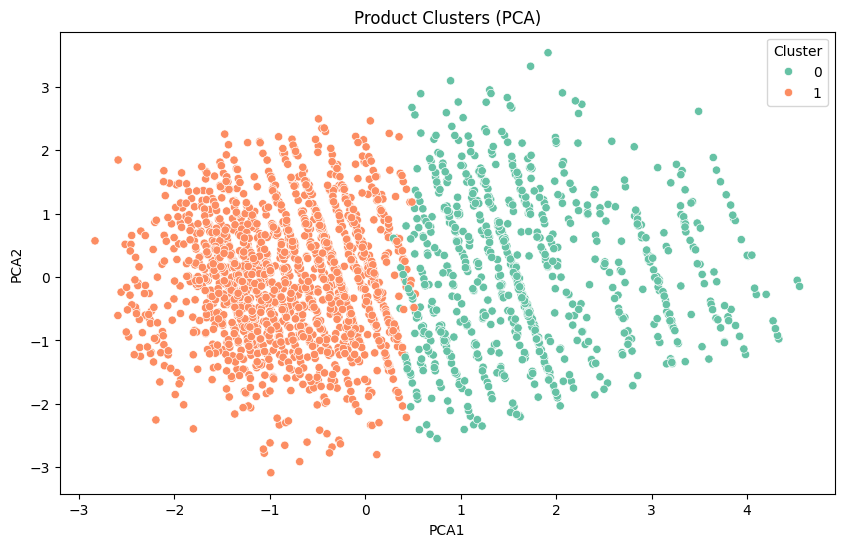

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)

df['PCA1'] = components[:, 0]
df['PCA2'] = components[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Product Clusters (PCA)')
plt.show()

In [37]:
print('KMeansModel Train Score is : ' , kmeans.score(scaled_features))
print('KMeansModel centers are : ' , kmeans.cluster_centers_)
print('KMeansModel labels are : ' , kmeans.labels_)
print('KMeansModel intertia is : ' , kmeans.inertia_)
print('KMeansModel No. of iteration is : ' , kmeans.n_iter_)

KMeansModel Train Score is :  -9009.496131389998
KMeansModel centers are :  [[ 0.97087549  1.21359571 -0.78437855  0.14298268 -0.16755017]
 [-0.45900023 -0.57375093  0.37083018 -0.06759784  0.0792126 ]]
KMeansModel labels are :  [0 1 1 ... 0 0 0]
KMeansModel intertia is :  9009.496131389997
KMeansModel No. of iteration is :  9


In [156]:
features = ['Listing Price', 'Sale Price', 'Discount', 'Rating', 'Reviews']

In [157]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

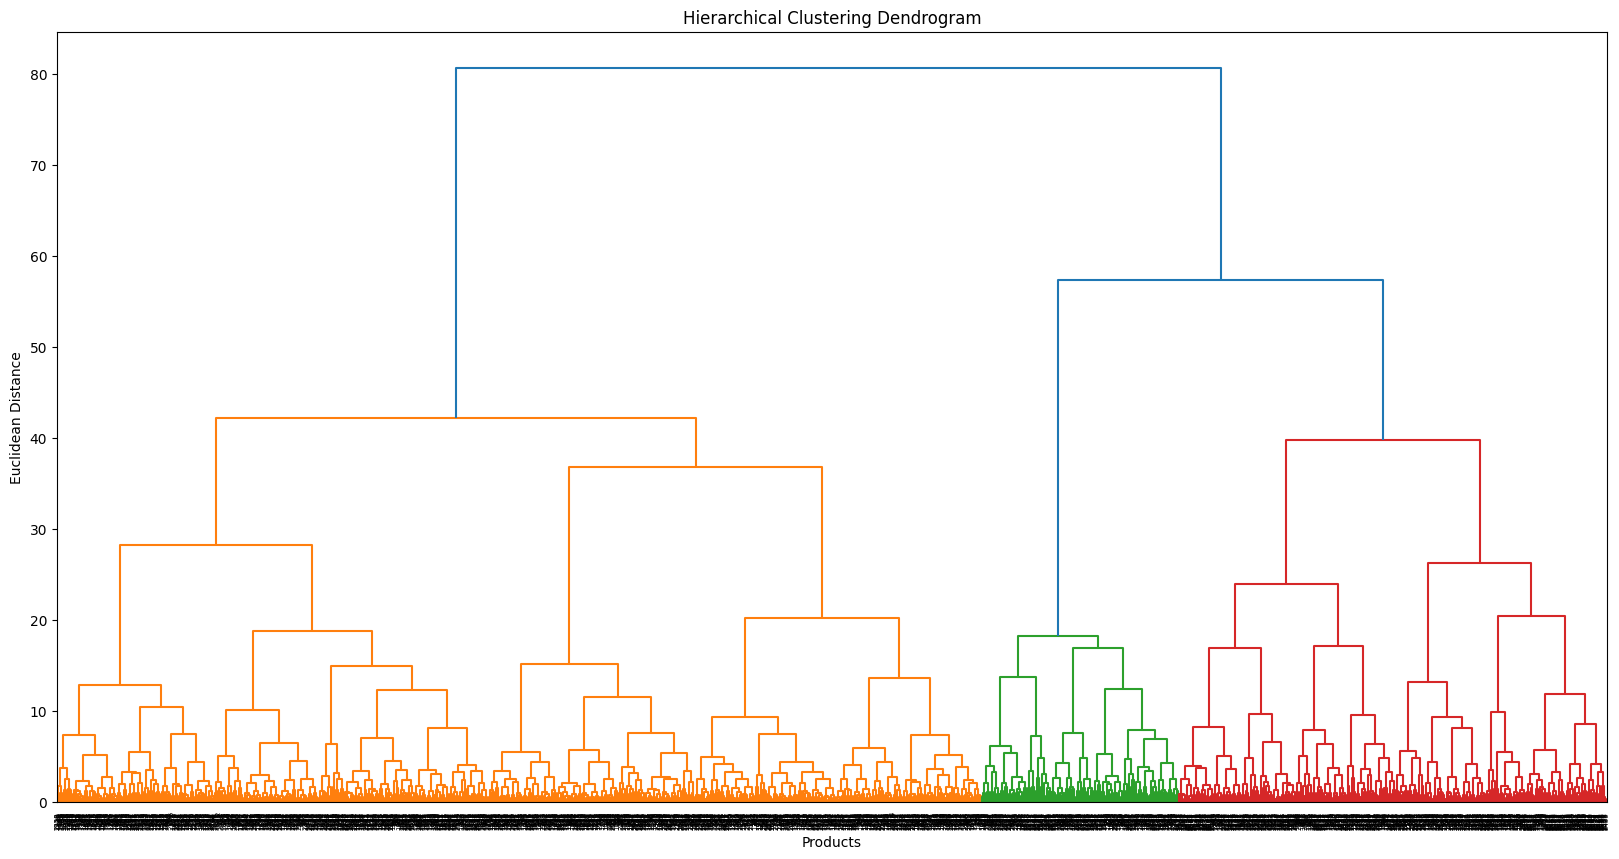

In [159]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Products')
plt.ylabel('Euclidean Distance')
plt.show()

In [161]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=2,metric='euclidean', linkage='ward')
df['HCluster'] = hc.fit_predict(X_scaled)


In [163]:
df['HCluster'].value_counts()


,count
HCluster,
1,1517
0,1025


In [164]:
df.groupby('HCluster')[features].mean()


,Listing Price,Sale Price,Discount,Rating,Reviews
HCluster,,,,,
0,9129.704390,6877.520976,14.673171,3.577561,44.423415
1,5908.624258,3214.538563,45.326302,3.429268,48.396836


In [165]:
pd.crosstab(df['HCluster'], df['Brand'], normalize='index') * 100


Brand,0,1
HCluster,,
0,87.121951,12.878049
1,100.000000,0.000000


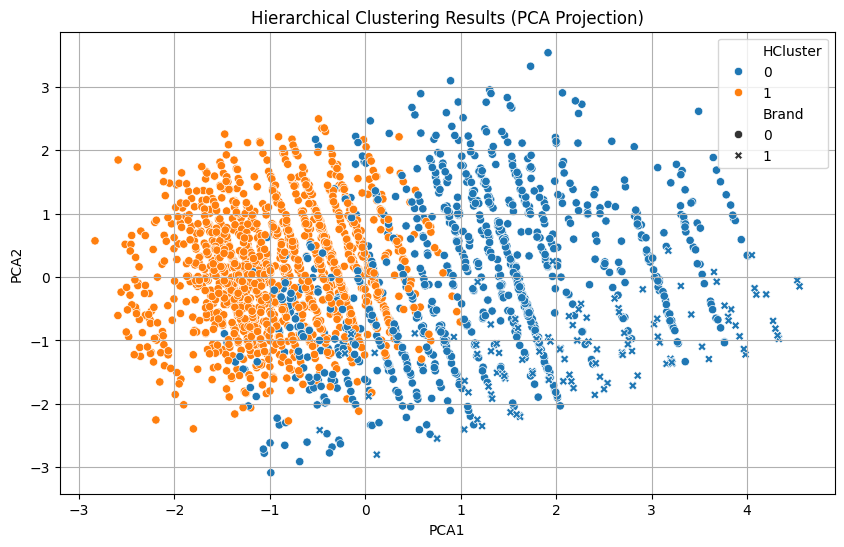

In [170]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='HCluster', style='Brand', palette='tab10')
plt.title('Hierarchical Clustering Results (PCA Projection)')
plt.grid(True)
plt.show()
